In [55]:
import pandas as pd
import numpy as np
from cellpose import models
from tifffile import imread
from skimage.io import imsave
from skimage.exposure import histogram
import matplotlib.pyplot as plt

In [148]:
df_path = r'D:\data_analysis\Betsy_Suraj\230112_Tcell_analysis\230117_exp_summary.pkl'

cd44_mask_dir = r'D:\data_analysis\Betsy_Suraj\230112_Tcell_analysis\segmentation_CD44'
dna_mask_dir = r'D:\data_analysis\Betsy_Suraj\230112_Tcell_analysis\segmentation_DNA_4'

In [3]:
df = pd.read_pickle(df_path)

In [4]:
df

,file_name,exp_dir,im_path,slide,well,exp,marker,dye,im_round,density,donor,treatment
0,T3737_9_2_1.0.4_R000_Cy3_CycB1-AF555_FINAL_AFR...,D:\data\T3737_9_2_Final,D:\data\T3737_9_2_Final\T3737_9_2_1.0.4_R000_C...,T3737_9_2,R000,T3737_9_2_R000,CycB1,Cy3,1,150,D1,0
1,T3737_9_2_1.0.4_R000_Cy5_CD8a-AF647_FINAL_AFR_...,D:\data\T3737_9_2_Final,D:\data\T3737_9_2_Final\T3737_9_2_1.0.4_R000_C...,T3737_9_2,R000,T3737_9_2_R000,CD8a,Cy5,1,150,D1,0
2,T3737_9_2_1.0.4_R000_Cy7_CD44-AF750_FINAL_AFR_...,D:\data\T3737_9_2_Final,D:\data\T3737_9_2_Final\T3737_9_2_1.0.4_R000_C...,T3737_9_2,R000,T3737_9_2_R000,CD44,Cy7,1,150,D1,0
3,T3737_9_2_1.0.4_R000_DAPI__FINAL_F.tif,D:\data\T3737_9_2_Final,D:\data\T3737_9_2_Final\T3737_9_2_1.0.4_R000_D...,T3737_9_2,R000,T3737_9_2_R000,DNA_01,DAPI,1,150,D1,0
4,T3737_9_2_1.0.4_R000_FITC_PCNA-AF488_FINAL_AFR...,D:\data\T3737_9_2_Final,D:\data\T3737_9_2_Final\T3737_9_2_1.0.4_R000_F...,T3737_9_2,R000,T3737_9_2_R000,PCNA,FITC,1,150,D1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
315,T3937_39_4.0.4_R007_Cy3_p21-AF555_FINAL_AFR_F.tif,D:\data\T3937_39_Final,D:\data\T3937_39_Final\T3937_39_4.0.4_R007_Cy3...,T3937_39,R007,T3937_39_R007,p21,Cy3,4,200,D2,24
316,T3937_39_4.0.4_R007_Cy5_FoxP3-AF647_FINAL_AFR_...,D:\data\T3937_39_Final,D:\data\T3937_39_Final\T3937_39_4.0.4_R007_Cy5...,T3937_39,R007,T3937_39_R007,FoxP3,Cy5,4,200,D2,24
317,T3937_39_4.0.4_R007_Cy7_cycB2-AF750_FINAL_AFR_...,D:\data\T3937_39_Final,D:\data\T3937_39_Final\T3937_39_4.0.4_R007_Cy7...,T3937_39,R007,T3937_39_R007,cycB2,Cy7,4,200,D2,24
318,T3937_39_4.0.4_R007_DAPI__FINAL_F.tif,D:\data\T3937_39_Final,D:\data\T3937_39_Final\T3937_39_4.0.4_R007_DAP...,T3937_39,R007,T3937_39_R007,DNA_04,DAPI,4,200,D2,24


In [29]:
# load cellpose model
model = models.Cellpose(gpu=True, model_type='cyto')

In [147]:
#to_segment = list(set(df.exp))
to_segment = ['T3937_39_R002','T3937_39_R004','T3937_39_R006','T3937_39_R007']
to_segment

['T3937_39_R002', 'T3937_39_R004', 'T3937_39_R006', 'T3937_39_R007']

In [ ]:
for sel_exp in to_segment:

    df_sel = df.loc[df.exp==exp_sel,:]

    dna_path = df_sel.loc[df_sel.marker=='DNA_04','im_path'].tolist()[0]
    dna_im_name = df_sel.loc[df_sel.marker=='DNA_04','file_name'].tolist()[0]

    cd44_path = df_sel.loc[df_sel.marker=='CD44','im_path'].tolist()[0]
    cd44_im_name = df_sel.loc[df_sel.marker=='CD44','file_name'].tolist()[0]

    dna_im = imread(dna_path)
    cd44_im = imread(cd44_path)

    # get image shape
    im_shape = dna_im.shape

    # segment DNA
    if (np.percentile(dna_im,99) < 1000):

        dna_im[-(int((im_shape[0]*im_shape[1]*0.01)/im_shape[1]) + 1):,:] = 5000

    labels, _, _, _ = model.eval(dna_im_small, diameter=15)

    # save DNA mask
    

    # segment CD44

    # save CD44 mask

In [135]:
exp_sel = 'T3937_39_R004'#'T3937_39_R001' T3737_9_2_R003

df_sel = df.loc[df.exp==exp_sel,:]


dna_path = df_sel.loc[df_sel.marker=='DNA_04','im_path'].tolist()[0]
dna_im_name = df_sel.loc[df_sel.marker=='DNA_04','file_name'].tolist()[0]

cd44_path = df_sel.loc[df_sel.marker=='CD44','im_path'].tolist()[0]
cd44_im_name = df_sel.loc[df_sel.marker=='CD44','file_name'].tolist()[0]

dna_im = imread(dna_path)
cd44_im = imread(cd44_path)

In [136]:
# create test images

test_size = 10000
im_shape = dna_im.shape

dna_im_small = dna_im[int((im_shape[0]-test_size)/2):int((im_shape[0]+test_size)/2),int((im_shape[1]-test_size)/2):int((im_shape[1]+test_size)/2)]
cd44_im_small = cd44_im[int((im_shape[0]-test_size)/2):int((im_shape[0]+test_size)/2),int((im_shape[1]-test_size)/2):int((im_shape[1]+test_size)/2)]

In [137]:
np.percentile(dna_im_small,99)

275.0

In [138]:
if (np.percentile(dna_im_small,99) < 1000):

    im_shape = dna_im_small.shape

    dna_im_small[-(int((im_shape[0]*im_shape[1]*0.01)/im_shape[1]) + 1):,:] = 5000

In [139]:
np.percentile(dna_im_small,99)

5000.0

In [140]:
#dna_im_small[:20,:] = 5000
labels, _, _, _ = model.eval(dna_im_small, diameter=15)

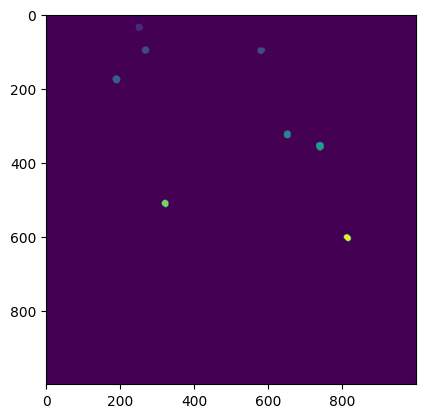

In [143]:
plt.imshow(labels[:1000,:1000])

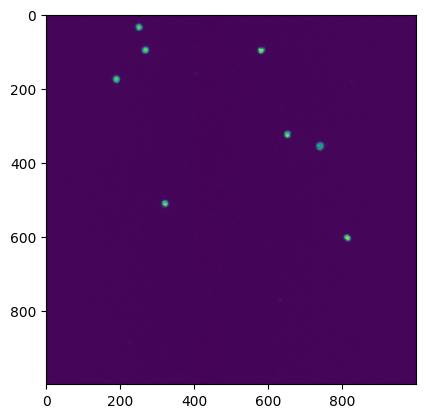

In [144]:
plt.imshow(dna_im_small[:1000,:1000])

In [33]:
hist, hist_centers = histogram(dna_im_small)

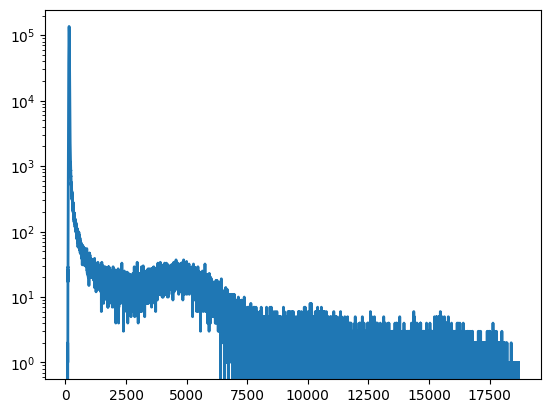

In [34]:
plt.plot(hist_centers, hist, lw=2)
plt.yscale("log")

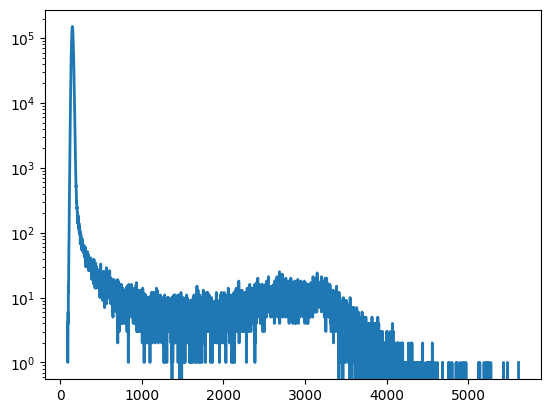

In [26]:
plt.plot(hist_centers, hist, lw=2)
plt.yscale("log")